In [44]:
%matplotlib inline
import imageio
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [45]:
img_matrix = imageio.imread('images/sobreexposicion.jpg')

img = Image.fromarray(img_matrix)

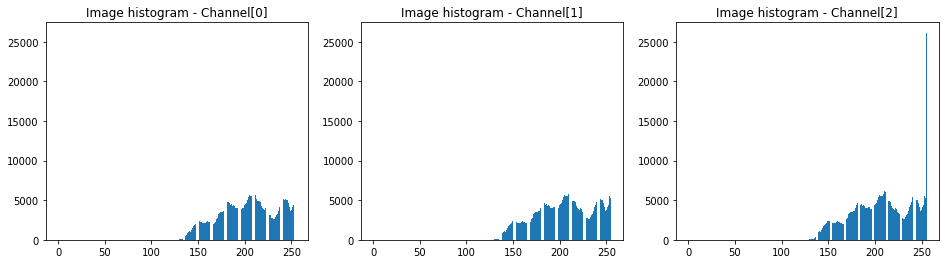

In [46]:
rows, cols, channels = img_matrix.shape

# Same as grayscale but using 3 channels (RGB)
histogram = np.zeros((3,256))

plt.figure(figsize=(16, 4))

for channel in range(channels):    
    for x in range(cols):
        for y in range(rows):
            histogram[channel,img_matrix[y, x]] = histogram[channel,img_matrix[y, x]] + 1

    ax = plt.subplot(1,3,channel+1)
    ax.bar(range(256), histogram[channel])
    plt.title("Image histogram - Channel[" + str(channel)+"]")


In [47]:
histogram_eq = histogram / (rows * cols)
accum = np.zeros((3,256))

for channel in range(channels):
    accum[channel,0] = histogram_eq[channel,0]

    for i in range(1, 255):
        accum[channel,i] = accum[channel,i - 1] + histogram_eq[channel,i]

image_new = np.zeros((rows, cols, 3), dtype=np.uint8)

for channel in range(channels):
    for x in range(rows):
        for y in range(cols):
            image_new[x, y, channel] = np.abs(np.floor(255 * accum[channel,img_matrix[x, y,channel]]))

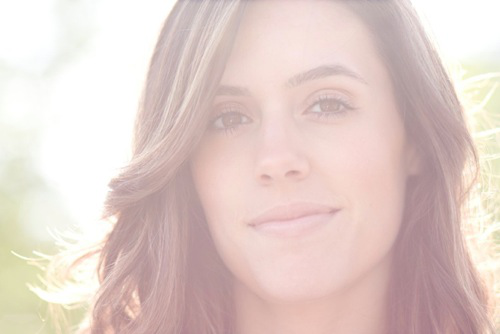

In [49]:
img

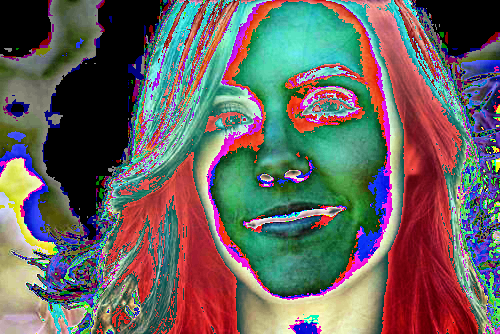

In [50]:
img_new = Image.fromarray(image_new)
img_new